In [218]:
from FDFD.Fdfd import Fdfd

import matplotlib.pylab as plt
import numpy as np
import scipy.sparse as sp

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [219]:
omega = 5e14
dl = 1e-7
xrange = [-5e-6, 5e-6]
yrange = [-5e-6, 5e-6]
NPML = [10, 10]
pol = 'Ez'

In [220]:
simulation = Fdfd(omega,dl,xrange,yrange,NPML,pol)

In [221]:
A = simulation.construct_A()


AttributeError: 'Fdfd' object has no attribute 'construct_A'

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


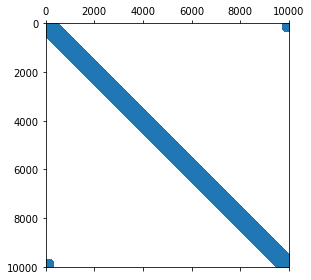

In [207]:
plt.spy(simulation.A)
plt.show()

In [208]:
eps_r = np.ones((simulation.Nx,simulation.Ny))
eps_r[40:60, 40:60] = 5

In [209]:
A_new = simulation.construct_A(eps_r=eps_r)

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


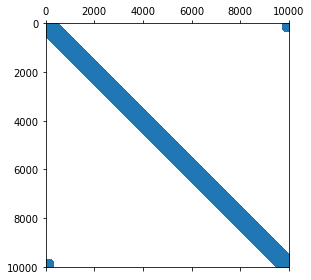

In [210]:
plt.spy(simulation.A)
plt.show()

In [211]:
simulation.derivs
simulation.A

<10000x10000 sparse matrix of type '<class 'numpy.complex128'>'
	with 50000 stored elements in Compressed Sparse Column format>

In [212]:
b = np.zeros((simulation.Nx,simulation.Ny))
b[50,30] = 1
(Hx,Hy,Ez) = simulation.solve_fields(b)

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


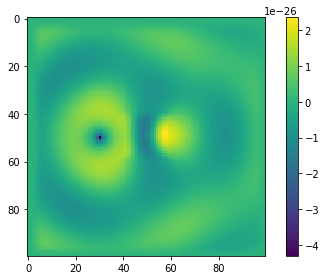

In [213]:
plt.imshow(np.real(Ez))
plt.colorbar()